In [ ]:
## importamos algumas bibliotecas que serão usadas
import numpy as np  # Para um mínimo de matemática
import matplotlib.pyplot as plt # Para gráficos
from scipy.special import binom # para coeficientes binomiais
from numpy.linalg import norm as npnorm # para calcular normas

# MAP2321 - EP4: Interpolação e Problema de Contorno


**Nome:** Narayan Shimanoe Lisboa

**Número USP:** 14600141

**Turma:** 02


O objetivo deste EP é implementar e aplicar as técnicas de interpolação polinomial, em particular a interpolação de Lagrange na sua forma baricêntrica, e usá-la para a resolução de um problema de contorno.


**Orientações:**
- Salve uma cópia deste notebook para editá-lo.
- Utilize o índice à esquerda para identificar as questões que precisam ser respondidas.
- As respostas das questões deverão ser respondidas nos espaços indicados abaixo.
- Envie o link do seu notebook na página de entrega da atividade no Moodle da disciplina.
- Data limite de entrega:

<font color='red'>
IMPORTANTE: o problema descrito neste EP depende de alguns parâmetros dependentes do seu número USP. Vamos definir $d_1,d_2$ e $d_3$ os três últimos dígitos do seu NUSP.

Complete e rode a célula abaixo indicando estes valores.
</font>



In [ ]:
d1 = 1 + 1## COMPLETAR COM O úLTIMO VALOR DO SEU NUSP +1
d2 = 4 + 1## COMPLETAR COM O PENúLTIMO VALOR DO SEU NUSP +1
d3 = 1 + 1## COMPLETAR COM O ANTIPENúLTIMO VALOR DO SEU NUSP +1

#Parte 1 - Interpolação de Lagrange na Forma Baricêntrica

## 1.1. Formulação do problema de interpolação

**Problema:**
Nesta seção, estamos interessados em discutir e implementar métodos de interpolação polinomial para uma dada tabela de pontos
$$
    \begin{array}{c|cccc}
        x & x_0 & x_1 & \dots & x_n \\
        \hline
        y & y_0 & y_1 & \dots & y_n
    \end{array} ,
$$
ou, resumidamente, $\{(x_i,y_i)\}_{i=0}^n$, ou seja, queremos encontrar o polinômio $p_n(x)$ (de grau menor ou igual a $n$) tal que, para todo $i=0,\cdots,n$:

$$p_n(x_i)=y_i.$$


Para isto, vamos trabalhar com os polinômios de Lagrange,
$L_{j}$, que são polinômios de grau $n$ satisfazendo:

$$
L_j(x_i) \equiv \delta_{ij} =
\left\{\begin{matrix}
1 & i=j \\
0 & i\neq j \\
\end{matrix}\right.
$$
onde $\delta_{ij}$ é o símbolo chamado de "delta de Kronecker". Estas propriedades asseguram que, de modo, geral:

$$
    p_n(x) = \sum_{j=0}^n y_j L_j(x)
$$

Com:

$$
    L_j(x) = \prod^n_{\substack{k = 0 \\ k \ne j}} \frac{x - x_k}{x_j - x_k}, \quad 0 \le j \le n.
$$

Esta fórmula de $L_j(x)$ possui alguns problemas numéricos, dentre os quais podemos citar a grande quantidade de operações aritméticas para o cálculo de $p_n(x)$, para um dado $x$, bem como a baixa estabilidade numérica do algoritmo. Para contornar estes problemas, uma forma alternativa foi desenvolvida.

**Interpolação Baricêntrica:**
O ponto de partida é reescrever o numerador de $L_j(x)$ como sendo $L(x)/(x-x_j)$, onde:
$$
L(x) = (x - x_0)(x - x_1) \dots (x - x_n)
$$

Desta forma, temos:

$$L_j(x) = \omega_j \frac{L(x)}{x-x_j} $$
onde os **pesos baricêntricos** $\omega_j$ são definidos como

$$
    \omega_j = \frac{1}{\prod^n_{\substack{k=0 \\ k \ne j}}(x_j - x_k)} , \quad 0 \le j \le n .
$$

Desta forma:

$$
p_n(x) = L(x) \sum_{j=0}^n y_j \frac{\omega_j}{x-x_j}
$$

Mas, sabemos também que

$$
    1 = \sum_{j=0}^n L_j(x) = L(x)\sum_{j=0}^n \frac{\omega_j}{x - x_j}, \quad \forall x \ne x_i,\ 0 \le i \le n,
$$

Logo, podemos isolar $L(x)$:
$$
L(x) = \frac{1}{\sum_{j=0}^n \frac{\omega_j}{x - x_j}}
$$

Levando a:
$$
p_n(x) = \frac{\sum_{j=0}^n y_j \frac{\omega_j}{x-x_j}}{\sum_{j=0}^n \frac{\omega_j}{x - x_j}}
$$

Podemos ver que são necessárias $O(n^2)$ operações aritméticas para o cálculo dos pesos $\omega_i$, mas a avaliação do polinômio $p_n(x)$, para um dado $x$ é de ordem $O(n)$.

**Casos Específicos:**
Há casos em que expressões analíticas para os pesos $\omega_i$ foram pré-estabelecidas. Podemos citar:

> **1)** Pontos igualmente espaçados no intervalo $[a,b]$
\begin{align}
    x_i &= a + i\cdot\left(\frac{b-a}{n}\right), \quad 0 \le i \le n,\\
    \omega_j &= (-1)^j \cdot \binom{n}{j}, \quad 0 \le j \le n.
\end{align}

> **2)** Pontos de Chebyshev do segundo tipo no intervalo $[a, b]$:
\begin{align}
    x_i &= \frac{b+a}{2}-\frac{b-a}{2} \cdot \cos\left(\frac{i\pi}{n}\right),\quad 0 \le i \le n,\\
    \omega_j &= (-1)^j \cdot d_j,\ 0 \le j \le n, \text{ com } d_0 = d_n = 0.5,\ d_j = 1,\ 1 \le j \le n-1.
\end{align}

Note que nos dois casos os pesos independem do intervalo $[a,b]$. A diferença em cada intervalo seria um fator de escala comum a todos os pesos, o que não muda o resultado da fórmula baricêntrica.


**Referência para a elaboração deste enunciado**:
Berrut & Trfethen, *Barycentric Lagrange Interpolation*, SIAM Review 46(3) (2004), pp. 501--517


## 1.2. - Implementação Computacional

Nesta seção, propomos a implementação de funções necessárias para a realização da interpolação polinomial Lagrangiana nas coordenadas baricêntricas, bem como suas derivadas.


### Questão 1.2.a
Dados pontos arbitrários na reta $\{x_i\}_{i=0}^n$, calcule os pesos baricentricos $\{\omega_i\}_{i=0}^n$

**Resposta:**


In [ ]:
# Cálculo dos pesos da fórmula baricêntrica
def weight_bary(xdata):
    # Cálculo dos pesos para a interpolação Lagrangeana baricêntrica.

    np1 = np.size(xdata) # n + 1

    # Calcule v[j] = prod_{k=0, k!=j}^n (x_k - x_j), 0 <= j <= n
    v = np.empty(np1)
    for i in range(np1):
      v[i] = 1
      for j in range(np1):
        if i != j:
          v[i] = v[i] * (xdata[i] - xdata[j])

    return 1.0/v

### Questão 1.2.b
Dados pontos equiespacados na reta $\{x_i\}_{i=0}^n$, tais que:
\begin{align}
    x_i &= a + i\cdot\left(\frac{b-a}{n}\right), \quad 0 \le i \le n,\\
    \omega_j &= (-1)^j \cdot \binom{n}{j}, \quad 0 \le j \le n.
\end{align}
calcule os pesos baricentricos $\{\omega_i\}_{i=0}^n$

**Resposta:**

In [ ]:
def weight_equi(npoints): # npoints pontos equidistantes (npoints = n+1)
    # Retorne um array  de tamanho n+1 cuja componente j é (-1)^j * binom(n,j), j de 0 a n
    ### SEU CÓDIGO AQUI

    v = np.empty(npoints)
    for j in range(npoints):
      v[j] = (-1)**j * binom(npoints-1,j)

    return v

### Questão 1.2.c.
Dados pontos (de Chebyshev) na reta $\{x_i\}_{i=0}^n$, distribuídos , tais que:
\begin{align}
    x_i &= \frac{b+a}{2} -\frac{b-a}{2} \cdot \cos\left(\frac{i\pi}{n}\right),\quad 0 \le i \le n,\\
    \omega_j &= (-1)^j \cdot d_j,\ 0 \le j \le n, \text{ com } d_0 = d_n = 0.5,\ d_j = 1,\ 1 \le j \le n-1.
\end{align}
calcule os pesos baricentricos $\{\omega_i\}_{i=0}^n$

**Resposta:**

In [ ]:
def weight_cheby2(npoints): # npoints (n+1) pontos de Chebyshev do segundo tipo
    # Retorne um array de tamanho (n+1) com componentes (-1)^j*d_j, 0 <= j <= n,
    # em que d_0 = 0.5, d_j = 1, 1 <= j <= n-1, d_n = 0.5
    ### SEU CÓDIGO AQUI
    v = np.empty(npoints)
    for j in range(npoints):
      if j == 0 or j == npoints-1:
        v[j] = (-1)**j * 0.5
      else:
        v[j] = (-1)**j * 1

    return v

### Questão 1.2.d
Dada uma tabela $\{(x_i,y_i)\}_{n=0}^n$, os pesos baricêntricos $\{\omega_i\}_{i=0}^n$ previamente calculados e um ponto $x \in \mathbb{R}$, calcule $p_{n}(x)$.






In [ ]:
def eval_bary(x, xdata, ydata, w):
    # Cálculo do valor no ponto x do polinômio interpolador
    # da tabela (xdata, ydata) usando a fórmula baricêntrica,
    # onde os pesos w relativos aos pontos xdata foram
    # previamente calculados.
    #
    # OBSERVAÇÃO: x pode ser escalar ou vetor
    nx = np.size(x)
    npoints = np.size(xdata)
    pn  = np.zeros(nx) # polinomio interpolador em x

    sum_num = np.zeros(nx)
    sum_den = np.zeros(nx)
    is_close = False

    for i in range(nx):
      for j in range(npoints):
        if np.isclose(x[i], xdata[j]):
          pn[i] = ydata[j]
          is_close = True
          break
        sum_num[i] += ydata[j] * w[j]/(x[i]-xdata[j])
        sum_den[i] += w[j]/(x[i]-xdata[j])

      if not is_close:
        pn[i] = sum_num[i]/sum_den[i]
      is_close = False




    if (nx > 1):
        return pn # retorna um array
    else:
        return pn[0] # retorna um escalar


### Questão 1.2.e
Vamos testas as funções previamente estabelecidas realizando-se a interpolação da seguinte função:

$$ f(x) = \frac{1}{1+(5x/d_1)^2} $$

Que será amostrada num intervalo $(-d_1,d_1)$ com $257$ pontos:

1) Igualmente espaçados \\
2) Chebyshev \\

Qual das estratégias funcionou melhor? Comente.





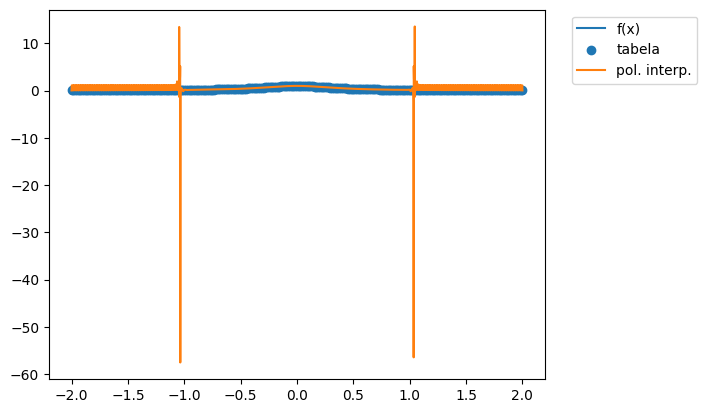

In [ ]:
def f(x): return 1/(1+(5*x/d1)**2)

# partição refinada
xx    = np.linspace(-d1, d1, 2048*d1 + 1) # Pontos para gerar gráficos
ff    = f(xx) # Valor da função nesses pontos

np1 = 257
n   = np1 - 1


# pontos equiespacados
xdE = np.linspace(-d1, d1, np1)
ydE = f(xdE)
wE  = weight_equi(np1)
yy  = eval_bary(xx, xdE, ydE, wE)
                   # com nós igualmente espaçados
plt.plot(xx, ff, label="f(x)")
plt.scatter(xdE, ydE, label="tabela")
plt.plot(xx, yy, label="pol. interp.")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

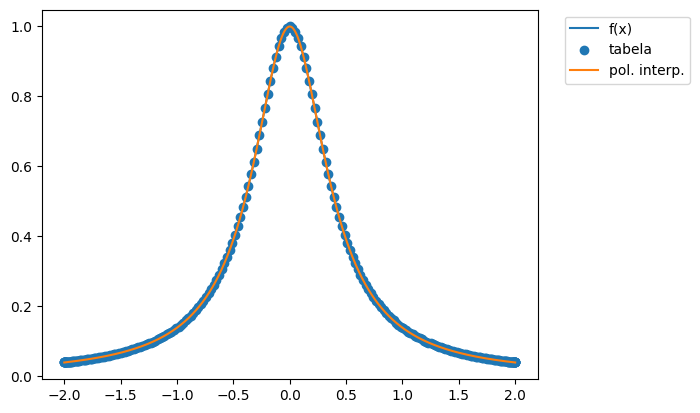

In [ ]:
# pontos de Chebyshev do segundo tipo
xdC = - d1 * np.cos(np.arange(n+1)*np.pi/n);
ydC = f(xdC)
wC  = weight_cheby2(np1)
yy  = eval_bary(xx, xdC, ydC, wC)
                   # com nós de Chebyshev do segundo tipo
plt.plot(xx, ff, label="f(x)")
plt.scatter(xdC, ydC, label="tabela")
plt.plot(xx, yy, label="pol. interp.")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");



#Parte 2 - Derivação e Problema de Contorno

## 2.1. Derivação dos polinômios interpoladores

**Problema:**
Nesta seção, estamos interessados em calcular as derivadas, nos pontos de interpolação, do polinomio interpolador, passando pelas derivadas dos polinomios de Lagrange $L_j(x)$ escritos na forma baricentrica. Esta informação será usada na seção seguinte, em que resolveremos um problema de contorno, envolvendo uma Equação Diferencial Ordinária, descrevendo uma relação entre uma dada função e suas derivadas.

Seja $p_n(x)$ o polinomio interpolador dado por:
$$
p_n(x) = \sum_{j=0}^n y_j L_j(x)
$$
A primeira e segunda derivadas desta função podem ser calculadas por:
$$
p_n'(x) = \sum_{j=0}^n y_j L_j'(x), \;\;\; p_n''(x) = \sum_{j=0}^n y_j L_j''(x)
$$

Vamos denotar por $D^{(1)}$ e $D^{(2)}$ as matrizes cujas entradas são:
$$D^{(1)}_{ij} = L'_j(x_i), \;\;\;  D^{(2)}_{ij} = L''_j(x_i)$$

É possível mostrar que, se $i \neq j$:
$$L'_j(x_i) = \frac{\omega_j / \omega_i}{x_i-x_j}$$
$$L''_j(x_i) = -2 \frac{\omega_j / \omega_i}{x_i-x_j} \left( \sum_{k=0,k\neq i}^n \frac{\omega_k / \omega_i}{x_i-x_k} + \frac{1}{x_i-x_j} \right) $$

E:
$$L'_i(x_i) = - \sum_{j=0,j\neq i}^n L'_j(x_i)$$
$$L''_i(x_i) = - \sum_{j=0,j\neq i}^n L''_j(x_i)$$

Observe que

$$
  p_n'(x) = \sum_{i=0}^ny_i'L_i(x),\quad p_n''(x) = \sum_{i=0}^n y_i''L_i(x)
$$

em que

$$
  y_i' = \sum_{j=0}^nD_{ij}^{(1)}y_j,\quad y_i'' = \sum_{j=0}^nD_{ij}^{(2)}y_j,\quad 0\le i\le n.
$$

Podemos então avaliar $p_n'(x)$ e $p_n''(x)$ em qualquer ponto $x$ usando a fórmula baricêntrica com $y_j'$ e $y_j''$, respectivamente, no lugar de $y_j$.

**Referência para a elaboração deste enunciado**:
Berrut & Trfethen, *Barycentric Lagrange Interpolation*, SIAM Review 46(3) (2004), pp. 501--517


## 2.2. - Implementação Computacional

Nesta seção, propomos a implementação de funções necessárias para o cálculo das matrizes de derivação $D^{(1)}$ e $D^{(2)}$.


### Questão 2.2.a
Dados pontos arbitrários na reta $\{x_i\}_{i=0}^n$ e seus respectivos pesos baricêntricos $\{\omega_i\}_{i=0}^n$, calcule a matriz $D^{(1)}_{ij} = L_j'(x_i)$

**Resposta:**


In [ ]:
def matriz_derivada_1(xdata, w):
    # Dados as abscissas xdata da tabela e os pesos baricêntricos previamente
    # calculados, esta função obtém os coeficientes da matriz de derivação
    # D1 para a primeira derivada.

    np1 = np.size(xdata)       # n + 1
    D1 = np.empty((np1, np1))  # aloca memória para D1
    for i in range(np1):
      for j in range(np1):
        if i != j:
          D1[i,j] = w[j] / w[i] / (xdata[i] - xdata[j])
        else:
          D1[i,j] = 0
          for k in range(np1):
            if k != i:
              D1[i,j] -= w[k] / w[i] / (xdata[i] - xdata[k])

    return D1

### Questão 2.2.b
Dados pontos arbitrários na reta $\{x_i\}_{i=0}^n$ e seus respectivos pesos baricêntricos $\{\omega_i\}_{i=0}^n$, calcule a matriz $D^{(2)}_{ij} = L_j''(x_i)$

**Resposta:**

In [ ]:
def matriz_derivada_2(xdata, w):
    # Dados:
    # xdata - ordenadas da tabela
    # w     - pesos baricêntricos
    #
    # Calcula: matriz de derivação d2 para a segunda derivada
    D1 = matriz_derivada_1(xdata,w)

    return D1@D1

### Questão 2.2.c
Calcule a primeira e segunda derivadas da função
$$f(x)=\frac{1}{1+(5x/d_1)^2}$$
No intervalo anteriormente determinado, com a mesma quantidade de pontos de interpolação. Realize esta operação nos pontos equiespaçados e nos pontos de Chebyshev.


**Resposta:**

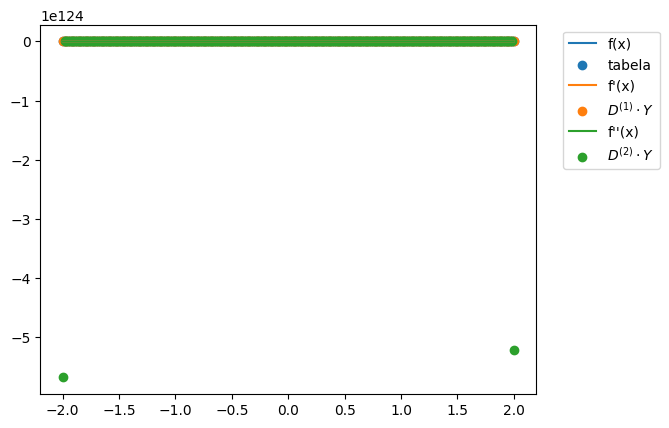

In [ ]:
def df(x):

  return -50*x/((d1 * (1 + (5*x/d1)**2))**2)

def d2f(x):
  ### SEU CÓDIGO AQUI

  return  -50/((d1 * (1 + (5*x/d1)**2))**2) + 5000*x**2/(d1 ** 4 * ((1 + (5*x/d1)**2))**3)

# partição refinada
xx    = np.linspace(-d1, d1, 2048*d1 + 1) # Pontos para gerar gráficos
ff    = f(xx) # Valor da função nesses pontos
dff   = df(xx) # Valor da derivada função nesses pontos
d2ff  = d2f(xx) # Valor da derivada segunda da função nesses pontos

# pontos equiespacados
xdE  = np.linspace(-d1, d1, np1)
ydE  = f(xdE)
wE  = weight_equi(np1)
yy  = eval_bary(xx, xdE, ydE, wE)
                   # com nós igualmente espaçados
D1   = matriz_derivada_1(xdE, wE)
D2   = matriz_derivada_2(xdE, wE)
dydE = np.dot(D1, ydE)
d2ydE= np.dot(D2, ydE)
plt.plot(xx, ff , label="f(x)")
plt.scatter(xdE, ydE, label="tabela")
plt.plot(xx, dff, label="f'(x)")
plt.scatter(xdE, dydE, label="$D^{(1)} \cdot Y$")
plt.plot(xx, d2ff, label="f''(x)")
plt.scatter(xdE,d2ydE, label="$D^{(2)} \cdot Y$")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

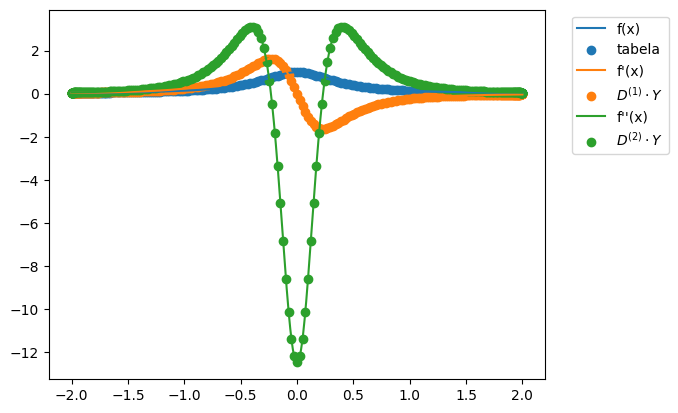

In [ ]:
# pontos de Chebyshev do segundo tipo
xdC  = - d1 * np.cos(np.arange(n+1)*np.pi/n);
ydC  = f(xdC)
wC  = weight_cheby2(np1)
yy  = eval_bary(xx, xdC, ydC, wC)
                   # com nós de Chebyshev do segundo tipo
D1   = matriz_derivada_1(xdC, wC)
D2   = matriz_derivada_2(xdC, wC)
dydC = np.dot(D1, ydC)
d2ydC= np.dot(D2, ydC)
plt.plot(xx, ff , label="f(x)")
plt.scatter(xdC, ydC, label="tabela")
plt.plot(xx, dff, label="f'(x)")
plt.scatter(xdC, dydC, label="$D^{(1)} \cdot Y$")
plt.plot(xx, d2ff, label="f''(x)")
plt.scatter(xdC,d2ydC, label="$D^{(2)} \cdot Y$")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");


## 2.3. Formulação do problema de contorno

**Problema:**
Nesta seção, estamos interessados em resolver o seguinte problema de contorno:

$$-u''(x) + p(x)u'(x) + q(x)u(x) = f(x), \;\;\; x \in (a,b)$$

Com:
$$u(a) = \alpha, \;\;\; u(b) = \beta$$

Onde as funções $q=q(x), p=p(x), f=f(x)$ são suaves em $(a,b)$.

Vamos procurar a solução $u=u(x)$ num espaço vetorial a dimensão $m$ de funções definidas em $[a,b]$, satisfazendo as condições de contorno e tal que ela satisfaz exatamente a equação diferencial nos pontos de **colocação**

$$-u''(x_i) + p(x_i)u'(x_i) + q(x_i)u(x_i) = f(x_i)$$

Em seguida, vamos utilizar a partição

$$a = x_0 < x_1 < \cdots < x_{n-1} < x_n = b $$
onde $\{x_i\}_{i=1}^{n-1}$ são os pontos de colocação que serão utilizados. Vamos aproximar a função $u(x)$ por um polinômio $y(x)$ de grau $n$:

$$y(x) = \sum_{j=0}^n y_j L_j(x) $$

Impondo as condições de contorno, temos que $y_0=\alpha$ e $y_{n} = \beta$, e os valores $y_1,\cdots , y_{n-1}$ são determinados por:

$$\sum_{j=1}^{n-1} \left( -L_j''(x_i) + p(x_i) L_j'(x_i) + q(x_i) L_j(x_i) \right) y_j = f(x_i) - \alpha ( - L_0''(x_i) + p(x_i) L_0'(x_i) + q(x_i) L_0(x_i)) - \beta ( - L_n''(x_i)  + p(x_i) L_n'(x_i) + q(x_i) L_n(x_i)), \;\;\; i = 1, \cdots,n-1 $$

Ou então, em termos das matrizes calculadas anteriormente, e lembrando que $L_j(x_i)=0$ se $i\neq j$ e 1 se $i=j$:

$$\sum_{j=1}^{n-1} \left( -D^{(2)}_{ij} + p(x_i) D^{(1)}_{ij} \right) y_j + q(x_i) y_i = f(x_i) - \alpha (-D^{(2)}_{i,0} + p(x_i) D^{(1)}_{i,0} )  - \beta (-D^{(2)}_{i,n} + p(x_i) D^{(1)}_{i,n}), \;\;\; i = 1, \cdots,n-1 $$


Este é um sistema linear a $n-1$ equações com $n-1$ incógnitas ($y_1,\cdots,y_{n-1}$), que pode ser escrito como:
$$
A \mathbf{x} = \mathbf{b}
$$

**Referência para a elaboração deste enunciado**:
Berrut & Trfethen, *Barycentric Lagrange Interpolation*, SIAM Review 46(3) (2004), pp. 501--517


### Questão 1.3.a
Vamos considerar o problema do potencial eletrostático
$$
\frac{\partial^2 u}{\partial x_1^2} + \frac{\partial^2 u}{\partial x_2^2} + \frac{\partial^2 u}{\partial x_3^2} = 0
$$
Que deve ser resolvido numa casca esférica homogênea de raio interno $R_1=\min\{d_1,d_2\}$ e externo $R_2=\max\{d_1,d_2\} + 1$. Na parte interna, aplica-se o potencial $V_0=d_3$ e aterra-se a parte externa:
$$
u(R_1) = V_0, \;\;\; u(R_2) = 0
$$
Como o problema possui uma simetria esférica, sendo homogêneo nas coordenadas zenitas e azimutais, podemos chegar no seguinte problema de contorno:

$$
u''(r) + \frac{2}{r}u'(r) = 0, \;\;\; R_1 \leq r \leq R_2
$$
Com:
$$
u(R_1) = V_0, \;\;\; u(R_2) = 0
$$

Encontre a aproximação para a solução do problema através do método de colocação discutido anteriormente utilizando-se uma partição:

1) Igualmente espaçada \\
$$
r_i = R_1 + i * h, \;\;\; 0 \le i \le n, \;\;\; h=\frac{R_2-R_1}{n}
$$
2) Chebyshev \\
$$
x_i = \frac{R_2+R_1}{2}-\frac{R_2-R_1}{2} \cdot \cos\left(\frac{i\pi}{n}\right),\quad 0 \le i \le n
$$

onde $n$ já foi definido anteriormente.

**Resposta:**


In [ ]:
### Definindo funções auxiliares para resolver o problema, o problema está
### ná próxima célula.
def permutacao_matrix(M, p, q):
  """
  Permuta as linhas "p" e "q" da matriz "M"

  Entradas:
  - M: Matrix R^{m,n}
  - p,q: indices das linhas a serem permutadas

  Saídas:
  - M_perm: matriz cujas linhas foram permutadas
  """

  Lp = np.copy(M[q,:])
  Lq = np.copy(M[p,:])
  M_perm = np.copy(M)
  M_perm[p,:] = Lp
  M_perm[q,:] = Lq

  return M_perm


def op_elem_matrix(M, i, p, m):
  """
  Realiza a operação elementar L_i <- L_i - m * L_p

  Entradas:
  - M: Matrix R^{m,n}
  - p: indice da linha usada para anular a linha "L_i" (base)
  - i: Indice da linha ("L_i") cujo  a serem permutadas (alvo)

  Saídas:
  - M_modif: m

  """
  M_modif = np.copy(M)
  Lp = M[p,:]
  Li = M[i,:] - m*Lp
  M_modif[i,:] = Li

  return M_modif

def el_Gaussiana(M):
  """
  Realiza a eliminação Gaussiana na matriz M "m x n"
  Vamos armazenar tambem os multiplicadores

  Entradas:
  - M: Matrix R^{m,n}

  Saídas:
  - M_modif: matriz triangular (triangulo inferior com multiplicadores)
  """

  (n,m) = M.shape

  # tolerancia para tomarmos um valor como "zero"
  tol = 1.e-8

  for p in range(0,n):

    # Verificmos se o pivo e nulo. Se sim, realizamos permutacao de linhas
    if abs(M[p,p]) < tol:
      for i in range(1,n-p):
        if abs(M[p+i,p]) > tol:
          M = permutacao_matrix(M,p,p+i)
          break
      # Vamos trocar a linha com a próxima, tal que seu pivô seja não-nulo


    for q in range(p+1,n):
      m = M[q,p] / M[p,p]
      M_new = op_elem_matrix(M,q,p,m)
      M = np.copy(M_new)

  return M

def res_triangular_superior(U,d):
  """
  Resolve o sistema, suposto triangular superior, U x = d

  Entradas:
  - U: Matriz R^{n,n}
  - d: Matriz R^{n,k}

  Saídas:
  - x: Matriz de solucao, R^{n,k} (um poara cada coluna em "d")
  """

  x   = np.copy(d)
  rhs = np.copy(x)

  (n,k) = d.shape

  for l in range(0,k):
      for i in range(n-1,-1,-1):
          # vamos calcular o termo forcante (rhs, "right-hand-side")

          # em seguida, vamos calcular a solução
          for j in range(i + 1, n):
            rhs[i,l] -= U[i, j] * x[j, l]
          x[i, l] = rhs[i,l] / U[i, i]
  return x

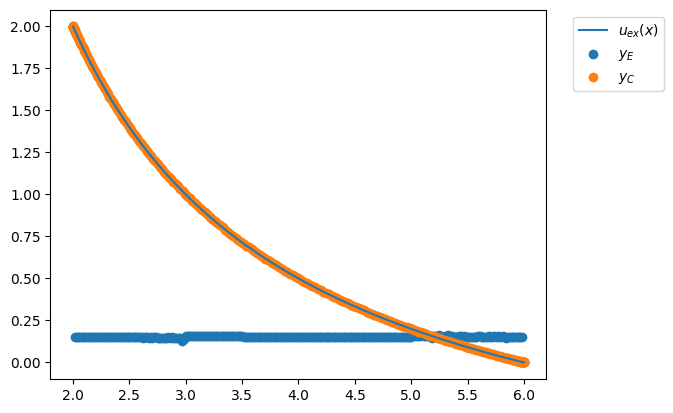

In [ ]:

R1 = np.min([d1,d2])
R2 = np.max([d1,d2]) + 1
V0 = d3
h  = (R2-R1)/ n

def uex(x): return (V0*R1/x)*(R2-x)/(R2-R1) # solução exata
rr = np.linspace(R1, R2, 10241) # Pontos para gerar gráficos
uu = uex(rr) # Valor da função nesses pontos
interior = np.arange(1, np1-1)
# Equiespacados
rE  = np.linspace(R1, R2, np1)
wE  = weight_equi(np1)
D1E = matriz_derivada_1(rE, wE)
D2E = matriz_derivada_2(rE, wE)
AE = np.zeros((np1-2, np1-2))
bE = np.zeros( np1-2 )
for m,i in enumerate(interior):
    for k,j in enumerate(interior):
        AE[m,k] = D2E[i,j] + (2/rE[i]) * D1E[i,j]
    bE[m] = -V0 * ( D2E[i,0] + (2/rE[i]) * D1E[i,0] )
ME = np.column_stack((AE, bE))
ME = el_Gaussiana(ME)

(rows, cols) = ME.shape
yE  = res_triangular_superior(ME[0:rows,0:rows], ME[0:rows,rows:cols])
# Para isto, utilize as funções de eliminação de Gauss desenvolvidas no EP2
yE2 = [V0] + list(yE.flatten()) + [0]

# Chebyshev
# pontos de Chebyshev do segundo tipo
rC  = (R2+R1)/2. - (R2-R1)/2. * np.cos(np.arange(np1)*np.pi/n);
wC  = weight_cheby2(np1)
D1C = matriz_derivada_1(rC, wC)
D2C = matriz_derivada_2(rC, wC)
AC = np.zeros((np1-2, np1-2))
bC = np.zeros( np1-2 )
for m,i in enumerate(interior):
    for k,j in enumerate(interior):
        AC[m,k] = D2C[i,j] + (2/rC[i]) * D1C[i,j]
    bC[m] = -V0 * ( D2C[i,0] + (2/rC[i]) * D1C[i,0] )

MC = np.column_stack((AC, bC))
MC = el_Gaussiana(MC)

(rows, cols) = MC.shape
yC  = res_triangular_superior(MC[0:rows,0:rows], MC[0:rows,rows:cols])
# Para isto, utilize as funções de eliminação de Gauss desenvolvidas no EP2
yC2 = [V0] + list(yC.flatten()) + [0]
# logo após reconstruir yE2 e yC2:

plt.plot(rr, uu , label="$u_{ex}(x)$")
plt.scatter(rE, np.array(yE2, dtype=float), label="$y_E$")
plt.scatter(rC, np.array(yC2, dtype = float), label="$y_C$")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");




